# EDA 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np 
import pandas as pd 
import datetime 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [3]:
df_train = pd.read_csv("/content/drive/MyDrive/credit_card/Reduced_train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/credit_card/Reduced_test.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (406,409,410,417,421,422,423,424,425,427,428,429,430,431,432,433,434) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (405,408,409,416,420,421,422,423,424,426,427,428,429,430,431,432,433) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df_train.head()

,Unnamed: 0,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,...,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,...,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,NaN,621.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,NaN,outlook.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,NaN,NaN,yahoo.com,NaN,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,...,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,NaN,New,NotFound,225.0,NaN,176.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,NaN,-300.0,Found,Found,166.0,15.0,529.0,575.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10_11_6,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


### Some useful functions 

In [10]:
# This function returns the count of each values in the columns and Fraud % in each values. 

def count_and_perc_fraud_plot(df,col,size,title = ""):
    total = df_train.shape[0]
    perc_df = pd.crosstab(df_train[col],df_train["isFraud"],normalize = "index")*100
    perc_df =  perc_df.reset_index()
    perc_df.rename(columns={0:'NoFraud', 1:'Fraud'}, inplace=True)
    
    plt.figure(figsize= size)    
    plt.suptitle(f'{col} Distributions ', fontsize=24)
    
    plt.subplot(211)
    c1= sns.countplot( x=col,  data=df, order=list(perc_df[col].values))
    p1= c1.twinx()
    p1 = sns.pointplot(x=col, y='Fraud', data=perc_df, order=list(perc_df[col].values),
                       color='black', legend=False, )
    
    
    p1.set_ylim(0,perc_df['Fraud'].max()*1.1)
    p1.set_ylabel("%Fraud Transactions", fontsize=16)
    c1.set_title(f"Most Frequent {col} values and % Fraud Transactions" + title, fontsize=20)
    c1.set_xlabel(f"{col} Category Names", fontsize=16)
    c1.set_ylabel("Count", fontsize=17)
    c1.set_xticklabels(c1.get_xticklabels(),rotation=45)
    sizes = []
    for p in c1.patches:
        height = p.get_height()
        sizes.append(height)
        c1.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(height/total*100),
                ha="center",fontsize=12)
        
    c1.set_ylim(0,max(sizes)*1.15)
    plt.show()


In [11]:
# Distribution plots 
def distribution_plot(df,col,size = (5,5),title = ""):
    plt.figure(figsize= size)
    sns.distplot(df[col][df["isFraud"] == 1].dropna(),label="Fruad")
    sns.distplot(df[col][df["isFraud"] == 0].dropna(),label="NoFruad")
    plt.title(col + " Distribution")
    plt.legend()
    plt.show()

In [12]:
# columns names 
def columns_names(base_str,start_int,end_int):
    return [base_str + str(i) for i in range(start_int,end_int+1)]

# EDA 

In [13]:
columns = list(df_train.columns)

#### IsFraud

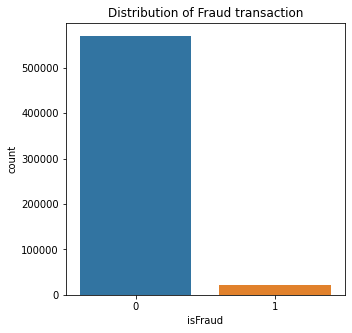

In [14]:
plt.figure(figsize=(5,5))
sns.countplot(x="isFraud",data = df_train)
plt.title("Distribution of Fraud transaction")
plt.show ()

This shows that the dataset is highly imbalanced dataset . Therefore we will deal this probem while making the model.

#### Transaction DT
<br> According to data description The TransactionDT feature is a timedelta from a given reference datetime (not an actual timestamp).
Since it is a timedelta ,exact date is note important </br> 

In [15]:
startdate = datetime.datetime.strptime('2019-12-01', '%Y-%m-%d')
df_train['trans_dt'] = df_train['TransactionDT'].apply(lambda x: (startdate + datetime.timedelta(seconds = x)))
df_test['trans_dt'] = df_test['TransactionDT'].apply(lambda x: (startdate + datetime.timedelta(seconds = x)))

In [16]:
# Let's check that if the fraud is committed in a particular hour,Day_of_week,Day_of_month.

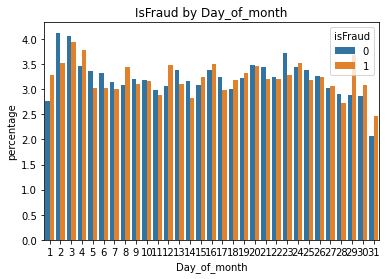

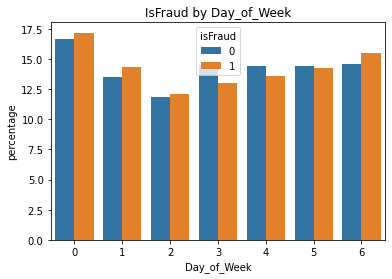

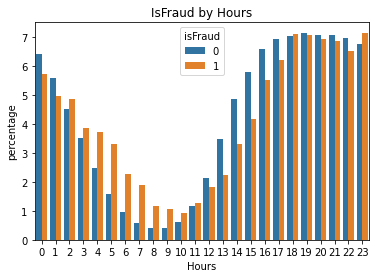

In [17]:
startdate = datetime.datetime.strptime('2019-12-01', '%Y-%m-%d')
df_train['trans_dt'] = df_train['TransactionDT'].apply(lambda x: (startdate + datetime.timedelta(seconds = x)))
df_test['trans_dt'] = df_test['TransactionDT'].apply(lambda x: (startdate + datetime.timedelta(seconds = x)))

df_train["Day_of_Week"]=df_train["trans_dt"].dt.dayofweek
df_train["Hours"]=df_train["trans_dt"].dt.hour
df_train["Day_of_month"]=df_train["trans_dt"].dt.day

for i in ["Day_of_month","Day_of_Week","Hours"]:
    plt.title("IsFraud by " + i)
    data = df_train.groupby(["isFraud"])[i].value_counts(normalize = True).mul(100).rename("percentage").reset_index().sort_values(i)
    sns.barplot(x = i , y = "percentage",hue= "isFraud",data = data)
    plt.show()

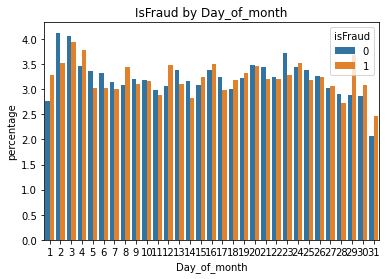

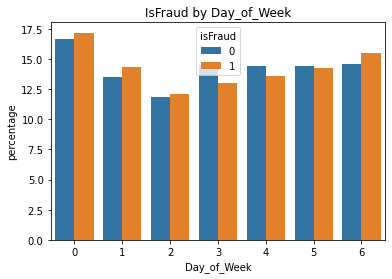

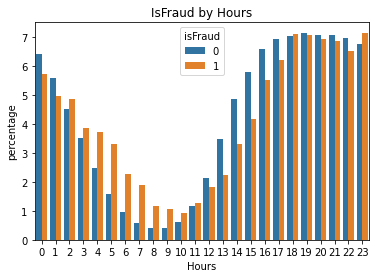

In [18]:
for i in ["Day_of_month","Day_of_Week","Hours"]:
    plt.title("IsFraud by " + i)
    data = df_train.groupby(["isFraud"])[i].value_counts(normalize = True).mul(100).rename("percentage").reset_index().sort_values(i)
    sns.barplot(x = i , y = "percentage",hue= "isFraud",data = data)
    plt.show()
    


Now we explore the variable TransactionAmt 

In [19]:
df_train["TransactionAmt"].describe(percentiles=[0.99,0.90,0.75,0.50,0.25,0.10]).apply(lambda x: format(x, 'f'))

count    590540.000000
mean        135.027682
std         239.158822
min           0.251000
10%          25.950000
25%          43.300000
50%          68.750000
75%         125.000000
90%         275.200000
99%        1104.000000
max       31940.000000
Name: TransactionAmt, dtype: object

There is a high variance in data . Lets see how the is tranaction amount distributed.We will consider 99% of values for plotting since there outliers in this column. 


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


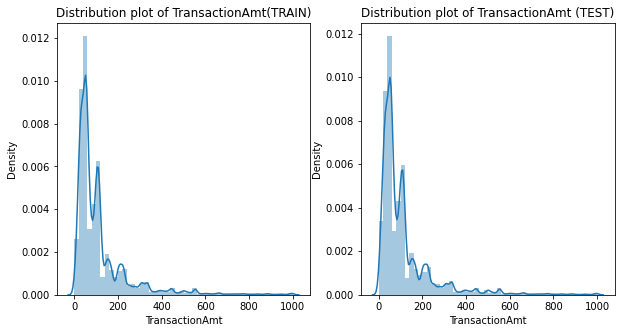

In [20]:

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Distribution plot of TransactionAmt(TRAIN)")
sns.distplot(df_train["TransactionAmt"][df_train["TransactionAmt"] <=1000])


plt.subplot(1,2,2)
plt.title("Distribution plot of TransactionAmt (TEST)")
sns.distplot(df_test["TransactionAmt"][df_test["TransactionAmt"] <=1000])
plt.show()



We see that "TransactionDT" resembles a log-normal distribution witha very high. Therefore to convert this distribution in to normal distribution we have to apply log transformation.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


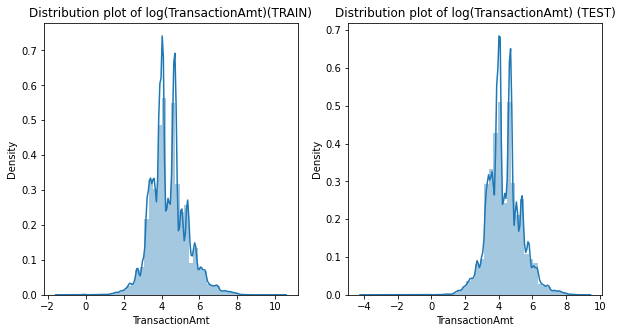

In [21]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Distribution plot of log(TransactionAmt)(TRAIN)")
sns.distplot(np.log(df_train["TransactionAmt"]))


plt.subplot(1,2,2)
plt.title("Distribution plot of log(TransactionAmt) (TEST)")
sns.distplot(np.log(df_test["TransactionAmt"]))
plt.show()

Now this resembles normal distribution. 

In [22]:
df_train["TransactionAmt_log"] = np.log(df_train["TransactionAmt"])
df_test["TransactionAmt_log"] = np.log(df_test["TransactionAmt"])

### Product CD

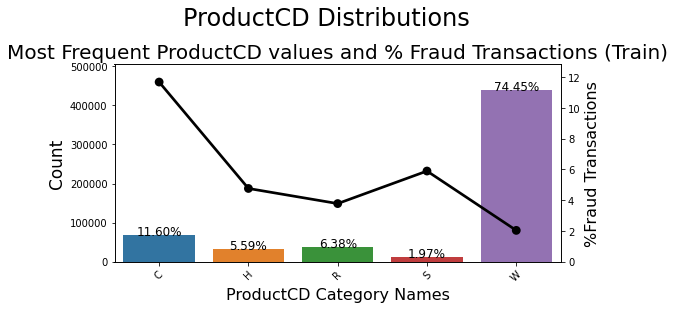

In [23]:
count_and_perc_fraud_plot(df_train,"ProductCD",size=(8,8),title=" (Train)")


### Card Variables

In [24]:
cards = columns_names('card',1,6)

In [25]:
df_train[cards].head()

,card1,card2,card3,card4,card5,card6
0,13926,NaN,150.0,discover,142.0,credit
1,2755,404.0,150.0,mastercard,102.0,credit
2,4663,490.0,150.0,visa,166.0,debit
3,18132,567.0,150.0,mastercard,117.0,debit
4,4497,514.0,150.0,mastercard,102.0,credit


It seems that card1,card2,car3 and card5 are continuous while card4 and card6 are categorical

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


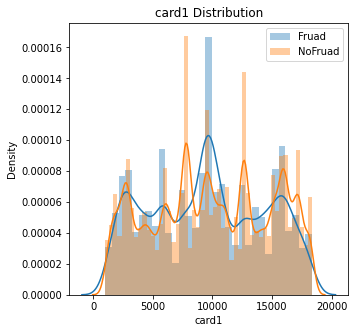

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


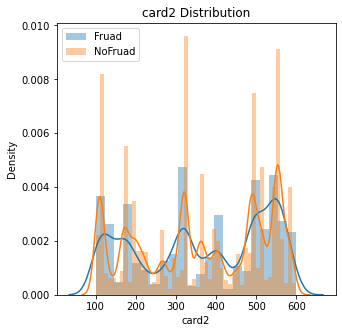

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


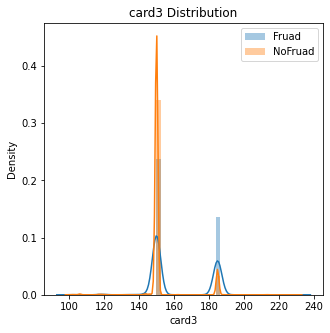

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


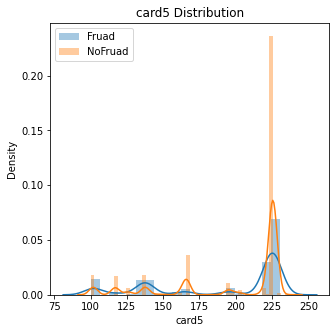

In [26]:
for card in ["card1","card2","card3","card5"]:
      distribution_plot(df_train,card,title="(TRAIN)")      

The values of card1 , acrd2 are evenly distributed but the values of card3 and card5 are concentrated to some values values only . We can convert them into  categorical features 

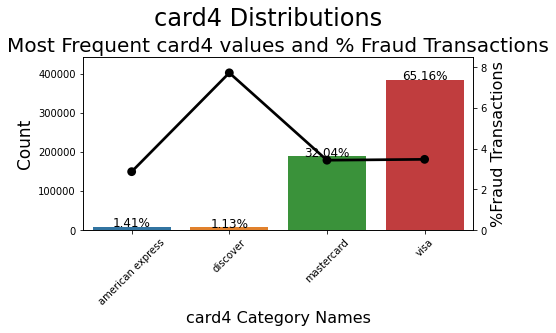

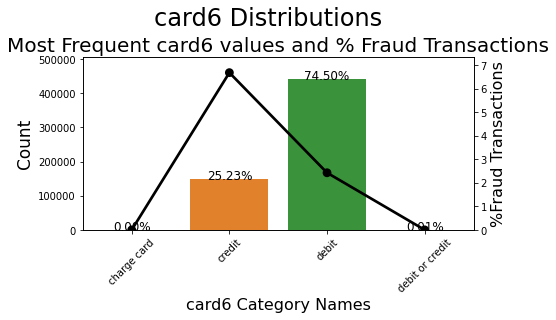

In [27]:
for i in ["card4","card6"]:
    count_and_perc_fraud_plot(df_train,i,size = (7,7))


### addr variables

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


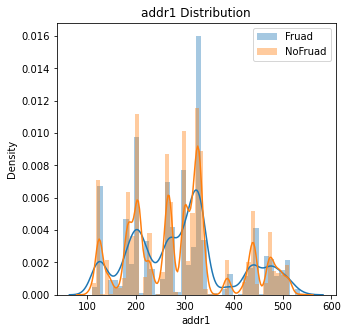

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


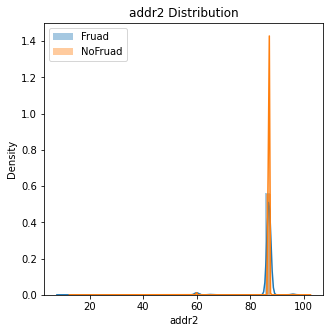

In [28]:
for i in ["addr1","addr2"]:
        distribution_plot(df_train,i)

### Dist Variables

In [29]:
dist = columns_names("dist",1,2)
df_train[dist].isnull().sum()
df_train[dist].describe(percentiles=[0.99,0.90,0.75,0.50,0.25,0.10])

,dist1,dist2
count,238269.000000,37627.000000
mean,118.502344,231.856273
std,371.874253,529.061542
min,0.000000,0.000000
10%,1.000000,1.000000
25%,3.000000,7.000000
50%,8.000000,37.000000
75%,24.000000,206.000000
90%,268.000000,634.400000
99%,2040.000000,2367.480000


There are lot of nan values in these columns 

These columns have a high standard deviation. One can see that that 99% percentage of the values lie under 2040 (dist1) but max value is 10286 , similar is the case with dist2

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


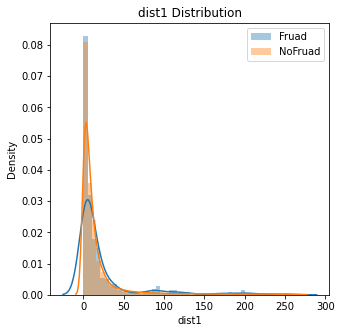

In [30]:
distribution_plot(df_train[df_train["dist1"]<=268],"dist1")

Dist 1 is higly skewed 

In [31]:
df_train["log_dst1"] = np.log1p(df_train["dist1"].fillna(0))
df_train["log_dst2"] = np.log1p(df_train["dist2"].fillna(0))

In [32]:
df_test["log_dst1"] = np.log1p(df_test["dist1"].fillna(0))
df_test["log_dst2"] = np.log1p(df_test["dist2"].fillna(0))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


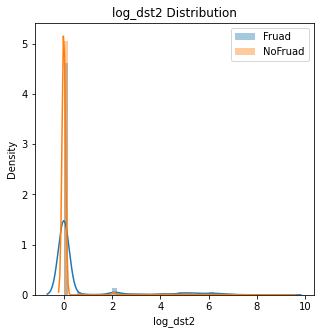

In [33]:
distribution_plot(df_train,"log_dst2")

#### D variables

In [34]:
D_vars = columns_names("D",1,15)
df_train[D_vars].isnull().sum()

D1       1269
D2     280797
D3     262878
D4     168922
D5     309841
D6     517353
D7     551623
D8     515614
D9     515614
D10     76022
D11    279287
D12    525823
D13    528588
D14    528353
D15     89113
dtype: int64

In [35]:
D_vars.append("trans_dt")

### D2

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


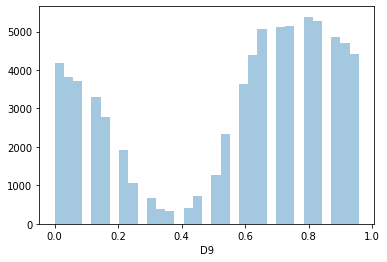

In [36]:
sns.distplot(df_train["D9"].dropna(),hist= True,kde = False)


## M variables


In [37]:
M_vars = columns_names("M",1,9)

In [38]:
df_train[M_vars].head()

,M1,M2,M3,M4,M5,M6,M7,M8,M9
0,T,T,T,M2,F,T,NaN,NaN,NaN
1,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN
2,T,T,T,M0,F,F,F,F,F
3,NaN,NaN,NaN,M0,T,F,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Except for M4 all the other variable values are in booleans 

In [39]:
def cat_plots(df,col,size):
    df[col].fillna("NA",inplace = True)
    fraud_perc = df.groupby(col)["isFraud"].value_counts(normalize = True).unstack().fillna(0)[1]
    
    plt.figure(figsize = size)
    
    g = sns.countplot(x = col,data = df,order = fraud_perc.index)
    g.set_title("{} Count".format(col),fontsize= 15)
    g.set_xlabel("{}".format(col),fontsize=15)
    g.set_ylabel("Count",fontsize=15)
    plt.xticks(rotation = "vertical")
    
    r = g.twinx()
    r = sns.pointplot(x = fraud_perc.index,y = fraud_perc,color = "blue")
    r.set_ylabel("Fraud Rate",fontsize = 16,color = "blue")
    
    
    

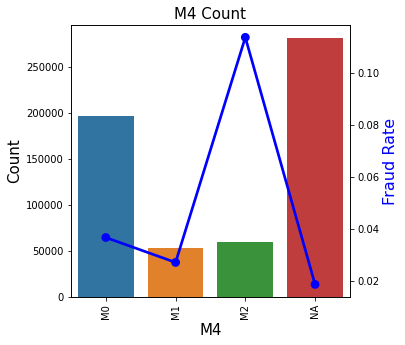

In [40]:
cat_plots(df_train,"M4",size = (5,5))

### Device_info

In [41]:
df_train["isFraud"] = df_train["isFraud"]

In [42]:
devices = df_train.groupby("DeviceInfo").filter(lambda x :  len(x) > 250)["DeviceInfo"].unique()

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


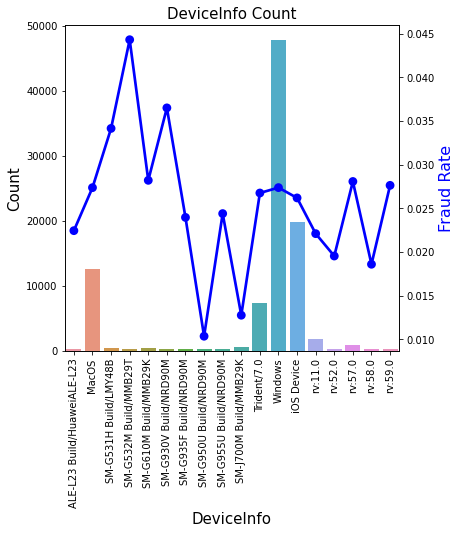

In [43]:
cat_plots(df = df_train[df_train["DeviceInfo"].isin(devices)],col = "DeviceInfo",size = (6,6))

#### V Variabables

In [44]:
V_vars = columns_names("V",1,339)

In [45]:
df_train[V_vars]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,...,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.00,117.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,117.0,0.0,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,50.00,1758.00,925.00,0.0,354.00,0.0,135.0,0.00,0.00,0.00,50.0,1404.0,790.0,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,1.0,1.0,1.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.00,47.95,0.00,0.0,47.94,0.0,0.0,47.94,47.94,47.94,0.0,0.0,0.0,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590537,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590538,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,117.00,2903.50,117.00,117.0,669.50,0.0,117.0,317.50,669.50,317.50,0.0,2234.0,0.0,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [47]:
def PCA_apply(df_train,df_test,cols,n_components,prefix = "PCA",rand_seed = 6):
    pca = PCA(n_components=n_components,random_state = rand_seed)
    principalComponents_train = pca.fit_transform(df_train[cols])
    principalComponents_test = pca.transform(df_test[cols])

    principalDF_train = pd.DataFrame(principalComponents_train)
    principalDF_test = pd.DataFrame(principalComponents_test)
    df_train.drop(cols,axis=1,inplace = True)
    df_test.drop(cols,axis=1,inplace = True)
    principalDF_train.rename(columns = lambda x :str(prefix) + str(x),inplace = True)
    principalDF_test.rename(columns = lambda x :str(prefix) + str(x),inplace = True)

    df_train = pd.concat([df_train,principalDF_train],axis = 1)
    df_test = pd.concat([df_test,principalDF_test],axis = 1)
    
    return df_train,df_test

In [48]:
V_cols = columns_names("V",1,339)

In [49]:
for col in V_vars:
    df_train[col] = df_train[col].fillna((df_train[col].min() - 2))
    df_test[col] = df_test[col].fillna((df_test[col].min() - 2))



In [50]:
min_max_scaler = MinMaxScaler()

df_train[V_cols] =  min_max_scaler.fit_transform(df_train[V_cols])
df_test[V_cols] =  min_max_scaler.transform(df_test[V_cols])

In [52]:
df_train,df_test = PCA_apply(df_train,df_test,V_cols,n_components =30,prefix = "PCA",rand_seed = 6)

In [54]:
list(df_train.columns)

['Unnamed: 0',
 'TransactionID',
 'isFraud',
 'TransactionDT',
 'TransactionAmt',
 'ProductCD',
 'card1',
 'card2',
 'card3',
 'card4',
 'card5',
 'card6',
 'addr1',
 'addr2',
 'dist1',
 'dist2',
 'P_emaildomain',
 'R_emaildomain',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'D6',
 'D7',
 'D8',
 'D9',
 'D10',
 'D11',
 'D12',
 'D13',
 'D14',
 'D15',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9',
 'id_01',
 'id_02',
 'id_03',
 'id_04',
 'id_05',
 'id_06',
 'id_07',
 'id_08',
 'id_09',
 'id_10',
 'id_11',
 'id_12',
 'id_13',
 'id_14',
 'id_15',
 'id_16',
 'id_17',
 'id_18',
 'id_19',
 'id_20',
 'id_21',
 'id_22',
 'id_23',
 'id_24',
 'id_25',
 'id_26',
 'id_27',
 'id_28',
 'id_29',
 'id_30',
 'id_31',
 'id_32',
 'id_33',
 'id_34',
 'id_35',
 'id_36',
 'id_37',
 'id_38',
 'DeviceType',
 'DeviceInfo',
 'trans_dt',
 'Day_of_Week',
 'Hours',
 'Day_of_month',
 'TransactionAmt_log',
 '

# Emails

There seem to be alot of related emails 

In [55]:
emails = {'gmail': 'google', 'att.net': 'att', 'twc.com': 'spectrum',
'scranton.edu': 'other', 'optonline.net': 'other', 'hotmail.co.uk': 'microsoft', 'comcast.net': 'other', 'yahoo.com.mx': 'yahoo', 'yahoo.fr'
: 'yahoo', 'yahoo.es': 'yahoo', 'charter.net': 'spectrum', 'live.com':
'microsoft', 'aim.com': 'aol', 'hotmail.de': 'microsoft', 'centurylink.net': 'centurylink', 
'gmail.com': 'google', 'me.com': 'apple', 'earthlink.net': 'other', 'gmx.de': 'other', 
'web.de': 'other', 'cfl.rr.com': 'other', 'hotmail.com': 'microsoft', 'protonmail.com': 'other', 
'hotmail.fr': 'microsoft', 'windstream.net': 'other', 'outlook.es': 'microsoft', 
'yahoo.co.jp': 'yahoo', 'yahoo.de': 'yahoo', 'servicios-ta.com': 'other', 'netzero.net': 'other', 
'suddenlink.net': 'other', 'roadrunner.com': 'other', 'sc.rr.com': 'other', 'live.fr': 'microsoft', 
'verizon.net': 'yahoo', 'msn.com': 'microsoft', 'q.com': 'centurylink',
'prodigy.net.mx': 'att', 'frontier.com': 'yahoo', 'anonymous.com': 'other', 'rocketmail.com': 'yahoo', 
'sbcglobal.net': 'att', 'frontiernet.net': 'yahoo', 'ymail.com': 'yahoo', 'outlook.com': 'microsoft', 
'mail.com': 'other', 'bellsouth.net': 'other', 'embarqmail.com': 'centurylink', 
'cableone.net': 'other', 'hotmail.es': 'microsoft', 'mac.com':
'apple', 'yahoo.co.uk': 'yahoo', 'netzero.com': 'other', 'yahoo.com':
'yahoo', 'live.com.mx': 'microsoft', 'ptd.net': 'other', 'cox.net': 'other', 'aol.com': 'aol', 
'juno.com': 'other', 'icloud.com': 'apple'}
us_emails = ['gmail', 'net', 'edu']
for c in ['P_emaildomain', 'R_emaildomain']:
    df_train[c + '_bin'] = df_train[c].map(emails)
    df_test[c + '_bin'] = df_test[c].map(emails)
    df_train[c + '_suffix'] = df_train[c].map(lambda x: str(x).split('.')[-1])
    df_test[c + '_suffix'] = df_test[c].map(lambda x: str(x).split('.')[-1])
    df_train[c + '_suffix'] = df_train[c + '_suffix'].map(lambda x: x if str(x) not in us_emails else 'us')
    df_test[c + '_suffix'] = df_test[c + '_suffix'].map(lambda x: x if str(x) not in us_emails else 'us')

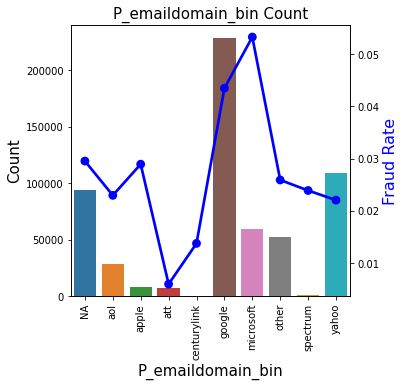

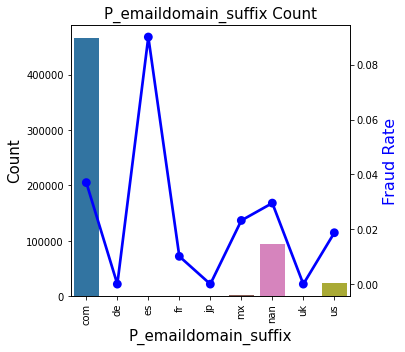

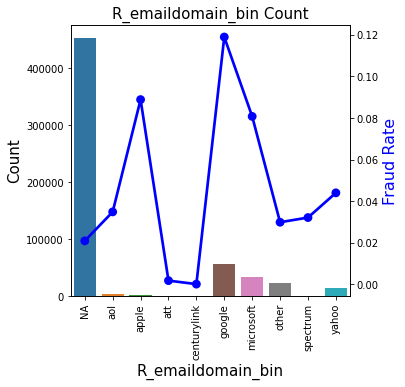

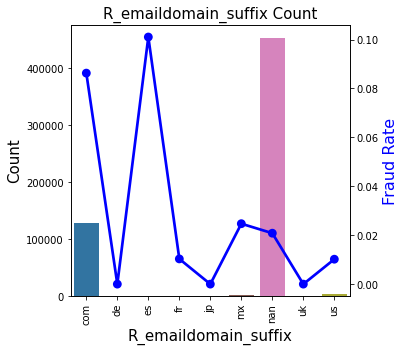

In [57]:
for i in ["P_emaildomain_bin","P_emaildomain_suffix","R_emaildomain_bin","R_emaildomain_suffix"]:
                    cat_plots(df_train,i,size=(5,5))


# Iden vars

In [58]:
def null_pers(df,col):
    null = df[col].isnull().sum()/len(df[col])*100
    uniq= df[col].nunique()
    return (col + " - null%: " + str(null) + " uniq: " + str(uniq))

            
   
   
    

In [70]:
id_num_vars = columns_names("id_0",1,9)
id_num_vars.extend(columns_names("id_",10,11))
id_cat = columns_names("id_",12,38)

There are alot of null values in id_vars. 

It is given that from id_12 to id_38 are categorica; colums 

In [73]:
df_train[id_cat]

,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38
0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T
1,NotFound,49.0,-300.0,New,NotFound,166.0,NaN,621.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T
2,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T
3,NotFound,52.0,NaN,New,NotFound,225.0,NaN,176.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T
4,NotFound,NaN,-300.0,Found,Found,166.0,15.0,529.0,575.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10_11_6,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


From the above table we can plot the columns which have few unique values

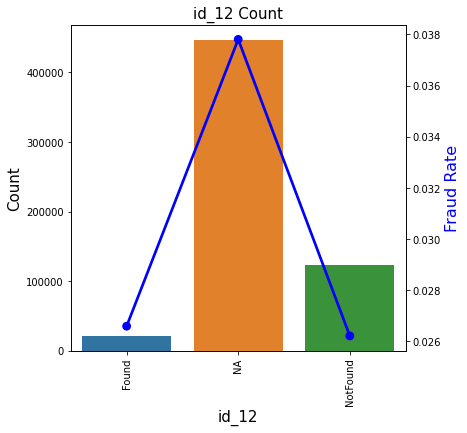

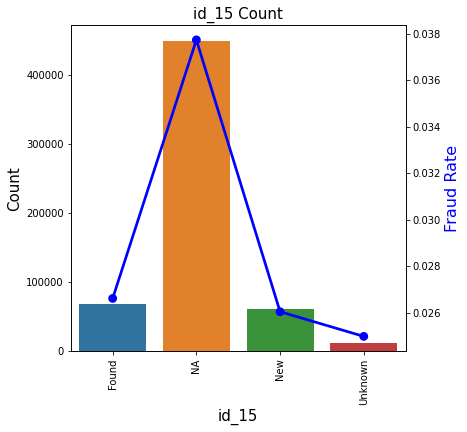

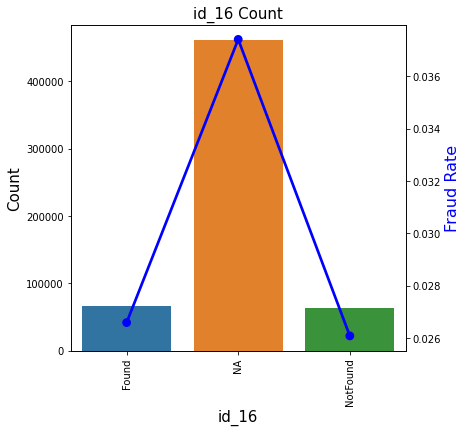

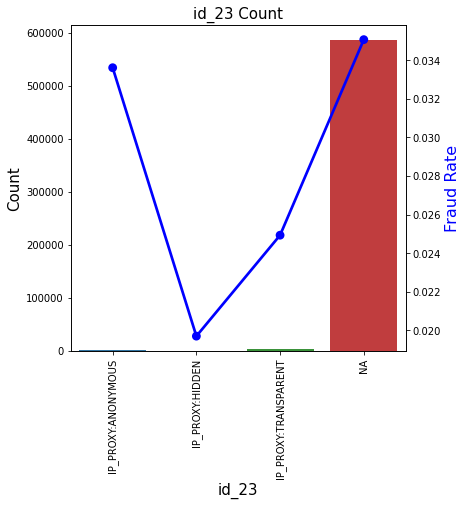

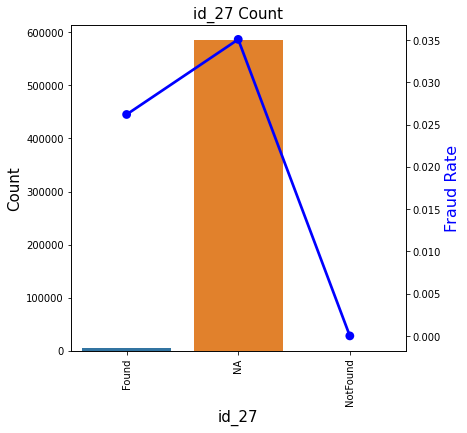

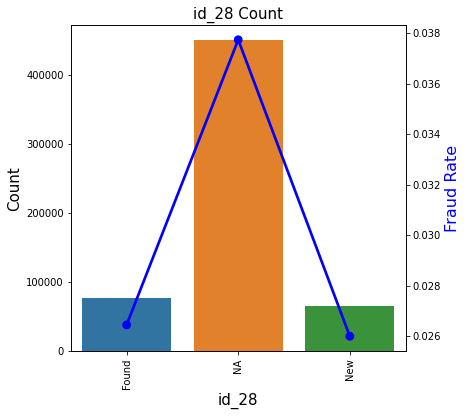

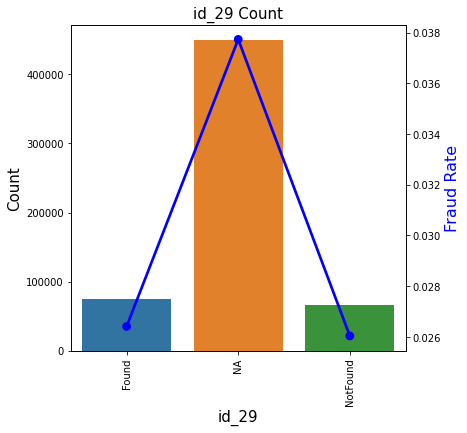

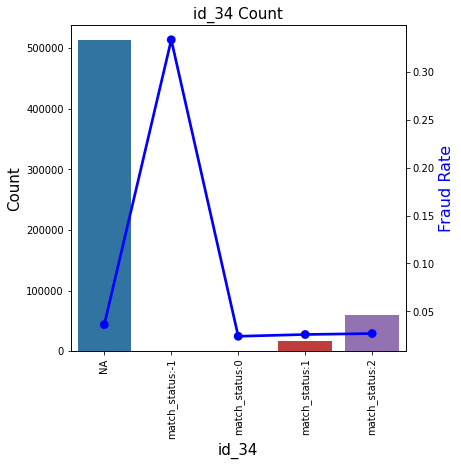

In [74]:
for col in ['id_12', 'id_15', 'id_16', 'id_23', 'id_27', 'id_28', 'id_29',"id_34"]:
    cat_plots(df_train,col,size=(6,6))

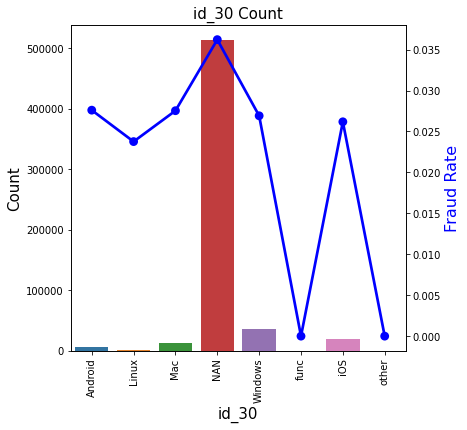

In [80]:
cat_plots(df_train,"id_30",size  = (6,6))

In [ ]:
df_train.loc[df_train['id_30'].str.contains('Windows', na=False), 'id_30'] = 'Windows'
df_train.loc[df_train['id_30'].str.contains('iOS', na=False), 'id_30'] = 'iOS'
df_train.loc[df_train['id_30'].str.contains('Mac OS', na=False), 'id_30'] = 'Mac'
df_train.loc[df_train['id_30'].str.contains('Android', na=False), 'id_30'] = 'Android'
df_train['id_30'].fillna("NAN", inplace=True)

df_test.loc[df_test['id-30'].str.contains('Windows', na=False), 'id_30'] = 'Windows'
df_test.loc[df_test['id-30'].str.contains('iOS', na=False), 'id_30'] = 'iOS'
df_test.loc[df_test['id-30'].str.contains('Mac OS', na=False), 'id_30'] = 'Mac'
df_test.loc[df_test['id-30'].str.contains('Android', na=False), 'id_30'] = 'Android'
df_test['id-30'].fillna("NAN", inplace=True)

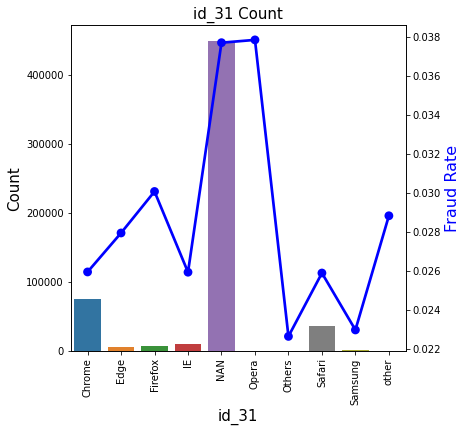

In [81]:
cat_plots(df_train,"id_31",size = (6,6))

## DEVICE INFO

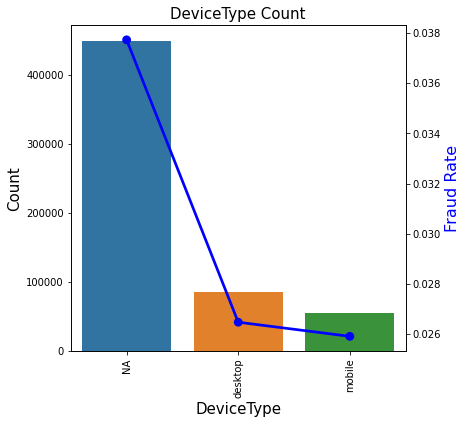

In [82]:
cat_plots(df_train,'DeviceType',size = (6,6))

## Preparing data for modeling

card2           8933
card3           1565
card4           1577
card5           4259
card6           1571
               ...  
id_35         449555
id_36         449555
id_37         449555
id_38         449555
DeviceInfo    471874
Length: 63, dtype: int64

In [125]:
train_null = df_train.isnull().sum()
nan_vals_train = list(train_null[train_null>0].index)

test_null = df_test.isnull().sum()
nan_vals_test = list(test_null[test_null>0].index)

Index(['Unnamed: 0', 'TransactionID', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'PCA25', 'PCA26', 'PCA27', 'PCA28', 'PCA29', 'P_emaildomain_bin',
       'P_emaildomain_suffix', 'R_emaildomain_bin', 'R_emaildomain_suffix',
       'id_30'],
      dtype='object', length=134)

In [126]:
print("Null values present in training data ",len(nan_vals_train))
print("Null values present in testing data ",len(nan_vals_test))


Null values present in training data  63
Null values present in testing data  91


In [127]:
main_list = list(set(nan_vals_test) - set(nan_vals_train))


In [97]:
id_cols_9 = columns_names("id-0",1,9)
id_cols = columns_names("id-",10,38)
id_cols_9.extend(id_cols)


In [117]:
id_cols_9_n = columns_names("id_0",1,9)
id_colsn = columns_names("id_",10,38)
id_cols_9_n.extend(id_colsn)

In [118]:
col_re = dict(zip(id_cols_9,id_cols_9_n))

In [120]:
df_test.rename(columns = col_re,inplace=True)

In [130]:
df_test[main_list].head()

,R_emaildomain_bin,M4,C3,C14,id_15,id_31,id_12,C4,C8,C1,C2,C10,P_emaildomain_bin,id_16,id_30,id_30,C9,id_23,C7,C6,C12,id_27,id_28,id_34,C5,C11,id_29,C13,DeviceType
0,NaN,NaN,0.0,6.0,New,chrome 67.0 for android,NotFound,0.0,0.0,6.0,6.0,0.0,google,NotFound,NAN,NaN,6.0,NaN,0.0,4.0,1.0,NaN,New,NaN,3.0,5.0,NotFound,115.0,mobile
1,NaN,M0,0.0,2.0,Found,chrome 67.0 for android,Found,0.0,0.0,3.0,2.0,0.0,aol,Found,Android 6.0.1,Android,2.0,NaN,0.0,1.0,1.0,NaN,Found,match_status:2,0.0,1.0,Found,12.0,mobile
2,NaN,M0,0.0,2.0,New,ie 11.0 for tablet,NotFound,0.0,0.0,2.0,2.0,0.0,microsoft,NotFound,NAN,NaN,4.0,NaN,0.0,5.0,0.0,NaN,New,NaN,0.0,2.0,NotFound,22.0,desktop
3,NaN,NaN,0.0,4.0,Found,chrome 67.0 for android,NotFound,0.0,0.0,5.0,2.0,0.0,google,Found,NAN,NaN,2.0,NaN,0.0,1.0,0.0,NaN,Found,NaN,1.0,2.0,Found,7.0,mobile
4,NaN,NaN,0.0,6.0,New,chrome 67.0 for android,NotFound,0.0,0.0,6.0,6.0,0.0,google,NotFound,NAN,NaN,5.0,NaN,0.0,5.0,0.0,NaN,New,NaN,2.0,6.0,NotFound,14.0,mobile


In [136]:
df_train["R_emaildomain_bin"]=df_train["R_emaildomain_bin"].fillna("UNK")
df_test["R_emaildomain_bin"] = df_test["R_emaildomain_bin"].fillna("UNK")


In [139]:
df_test["R_emaildomain_bin"]


0               UNK
1               UNK
2               UNK
3               UNK
4               UNK
            ...    
506686       google
506687    microsoft
506688          UNK
506689          UNK
506690    microsoft
Name: R_emaildomain_bin, Length: 506691, dtype: object